**CLONING OUR GITHUB REPOSITORY**

In [ ]:
!git clone https://github.com/MJAhmadi4907/3DSemanticNoveltyDetection

Cloning into 'SemNov_AML_DAAI_23-24'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 160 (delta 57), reused 149 (delta 48), pack-reused 0
Receiving objects: 100% (160/160), 135.09 KiB | 4.82 MiB/s, done.
Resolving deltas: 100% (57/57), done.


**DOWNLOADING THE REQUIRED PACKAGES**

In [ ]:
#pip install -r requirements.txt
# install minimal requirements (pytorch is already installed in colab)
!pip install timm==0.5.4 wandb tqdm h5py==3.6.0 protobuf==3.20.1 lmdb==1.2.1 msgpack-numpy==0.4.7.1 scikit-learn
!pip install "https://github.com/unlimblue/KNN_CUDA/releases/download/0.2/KNN_CUDA-0.2-py3-none-any.whl" ninja==1.10.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 59.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.8/257.8 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for lmdb: filename=lmdb-1.2.1-cp310-cp310-linux_x86_64.whl size=265647 sha256=49f26171903227482ce81860551df0a42e3e14175a8ea0c4be031e8c68ff68ab
  Stored in directory: /root/.cache/pip/wheels/ae/36/fc/13e586283759d30c3efc3d0b917b2c5f1b69d171de8b7ed204
Successfully built lmdb
  Attempting uninstal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 1.2 MB/s eta 0:00:00


**MOUNTING THE GOOGLE DRIVE/ DATA MANAGEMENT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dowloading The Database

In [ ]:
!sh download_data.sh

**CHANGING THE DIRECTORY TO SEMANTIC NOVELTY IN GOOGLE DRIVE**

In [ ]:
# Move to the project directory after Git clone
%cd /content/drive/MyDrive/3DSemanticNoveltyDetection

/content/drive/.shortcut-targets-by-id/1Tqs_ef7yA3RGiR9ZW1iy-uQwc5gPHizZ/SemNov_AML_DAAI_23-24


In [ ]:
# JUST PRINTING THE CONTENTS OF DIRECTORY + PATH
!ls /content/drive/MyDrive/3DSemanticNoveltyDetection/3D_OS_release_data
!pwd

modelnet40_normal_resampled  ScanObjectNN
/content/drive/MyDrive/SemNov_AML_DAAI_23-24


**PointNet++ Discriminative SR1 TRAINING + EVALUATION**

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/pn2-msg.yaml --exp_name PointNet2_CE2_SR1 --src SR1 --loss CE --batch_size 32 --resume /content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/PointNet2_CE_SR1/models/model_last.pth

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/pn2-msg.yaml --exp_name PointNet2_CE_SR1 --src SR1 --loss CE \
    -mode eval --ckpt_path /content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/PointNet2_CE_SR1/models/model_last.pth

Cannot import torchlars
Cannot load RSCNN: No module named 'pointnet2_ops'
Cannot load PCT: No module named 'pointnet2_ops'
Cannot load PointMLP: No module named 'pointnet2_ops'
Cannot load PointNet2: No module named 'pointnet2_ops'
out-of-distribution eval - Modelnet -> SONN ..
Arguments: Namespace(local_rank=None, use_sync_bn=False, use_amp=False, script_mode='eval', config='cfgs/pn2-msg.yaml', seed=1, epochs=150, batch_size=1, num_workers=4, resume=None, apply_fix_cellphone=True, data_root='./3D_OS_release_data', checkpoints_dir='outputs', exp_name='PointNet2_CE_SR1', eval_step=1, save_step=10, ckpt_path='/content/drive/MyDrive/SemNov_AML_DAAI_23-24/outputs/PointNet2_CE_SR1/models/model_last.pth', src='SR1', sonn_split='main_split', sonn_h5_name='objectdataset.h5', augm_set='rw', grad_norm_clip=-1, num_points=1024, num_points_test=2048, wandb_name=None, wandb_group='md-2-sonn-augmCorr', wandb_proj='benchmark-3d-ood-cla', loss='CE', cs=False, cs_gan_lr=0.0002, cs_beta=0.1, save_feats

**DGCNN CosSine Loss SR2 Training**

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/dgcnn-cla.yaml --epochs 15 --exp_name DGCNN_cosine_SR2 --src SR2 --loss cosine #--data_root /content/drive/MyDrive/AIFILES

Cannot import torchlars
Cannot load RSCNN: No module named 'pointnet2_ops'
Cannot load PCT: No module named 'pointnet2_ops'
Cannot load PointMLP: No module named 'pointnet2_ops'
Cannot load PointNet2: No module named 'pointnet2_ops'
training...
******************************
0/1 process initialized.

0/1 arguments: Namespace(local_rank=None, use_sync_bn=False, use_amp=False, script_mode='train', config='cfgs/dgcnn-cla.yaml', seed=1, epochs=15, batch_size=16, num_workers=4, resume=None, apply_fix_cellphone=True, data_root='./3D_OS_release_data', checkpoints_dir='outputs', exp_name='DGCNN_cosine_SR2', eval_step=1, save_step=10, ckpt_path=None, src='SR2', sonn_split='main_split', sonn_h5_name='objectdataset.h5', augm_set='rw', grad_norm_clip=-1, num_points=1024, num_points_test=2048, wandb_name=None, wandb_group='md-2-sonn-augmCorr', wandb_proj='benchmark-3d-ood-cla', loss='cosine', cs=False, cs_gan_lr=0.0002, cs_beta=0.1, save_feats=None, corruption=None, tar1='none', tar2='none', log_di

**DGCNN CosSine Loss SR2 Evaluation**

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/dgcnn-cla.yaml --exp_name DGCNN_cosine_SR2 --src SR2 --loss cosine \
    -mode eval --ckpt_path /content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/DGCNN_cosine_SR2/models/model_last.pth

Cannot import torchlars
Traceback (most recent call last):
  File "/content/drive/MyDrive/SemNov_AML_DAAI_23-24/classifiers/trainer_cla_md.py", line 19, in <module>
    from models.classifiers import Classifier
  File "/content/drive/MyDrive/SemNov_AML_DAAI_23-24/models/__init__.py", line 1, in <module>
    from models.dgcnn import DGCNN, DGCNNABN
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 975, in get_code
  File "<frozen importlib._bootstrap_external>", line 1074, in get_data
KeyboardInterrupt


**DGCNN SR2 TRAINING AND Evaluation**

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/dgcnn-cla.yaml --exp_name DGCNN_SR2_CE --src SR2 --loss CE --batch_size 32 --resume /content/drive/MyDrive/SemNov_AML_DAAI_23-24/outputs/DGCNN_SR2_CE/models/model_last.pth

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/dgcnn-cla.yaml --exp_name DGCNN_SR2_CE --src SR2 --loss CE \
    -mode eval --ckpt_path /content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/DGCNN_SR2_CE/models/model_last.pth

Cannot import torchlars
Cannot load RSCNN: No module named 'pointnet2_ops'
Cannot load PCT: No module named 'pointnet2_ops'
Cannot load PointMLP: No module named 'pointnet2_ops'
Cannot load PointNet2: No module named 'pointnet2_ops'
out-of-distribution eval - Modelnet -> SONN ..
Arguments: Namespace(local_rank=None, use_sync_bn=False, use_amp=False, script_mode='eval', config='cfgs/dgcnn-cla.yaml', seed=1, epochs=150, batch_size=1, num_workers=4, resume=None, apply_fix_cellphone=True, data_root='./3D_OS_release_data', checkpoints_dir='outputs', exp_name='DGCNN_SR2_CE', eval_step=1, save_step=10, ckpt_path='/content/drive/MyDrive/SemNov_AML_DAAI_23-24/outputs/DGCNN_SR2_CE/models/model_last.pth', src='SR2', sonn_split='main_split', sonn_h5_name='objectdataset.h5', augm_set='rw', grad_norm_clip=-1, num_points=1024, num_points_test=2048, wandb_name=None, wandb_group='md-2-sonn-augmCorr', wandb_proj='benchmark-3d-ood-cla', loss='CE', cs=False, cs_gan_lr=0.0002, cs_beta=0.1, save_feats=None,

**DGCNN SR1 Evaluation**

In [ ]:
!python classifiers/trainer_cla_md.py --config cfgs/dgcnn-cla.yaml --exp_name DGCNN_SR1_CE --src SR1 --loss CE \
    -mode eval --ckpt_path /content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/DGCNN_SR1_CE/models/model_last.pth

Cannot import torchlars
Cannot load RSCNN: No module named 'pointnet2_ops'
Cannot load PCT: No module named 'pointnet2_ops'
Cannot load PointMLP: No module named 'pointnet2_ops'
Cannot load PointNet2: No module named 'pointnet2_ops'
out-of-distribution eval - Modelnet -> SONN ..
Arguments: Namespace(local_rank=None, use_sync_bn=False, use_amp=False, script_mode='eval', config='cfgs/dgcnn-cla.yaml', seed=1, epochs=150, batch_size=1, num_workers=4, resume=None, apply_fix_cellphone=True, data_root='./3D_OS_release_data', checkpoints_dir='outputs', exp_name='DGCNN_SR1_CE', eval_step=1, save_step=10, ckpt_path='/content/drive/MyDrive/SemNov_AML_DAAI_23-24/outputs/DGCNN_SR1_CE/models/model_last.pth', src='SR1', sonn_split='main_split', sonn_h5_name='objectdataset.h5', augm_set='rw', grad_norm_clip=-1, num_points=1024, num_points_test=2048, wandb_name=None, wandb_group='md-2-sonn-augmCorr', wandb_proj='benchmark-3d-ood-cla', loss='CE', cs=False, cs_gan_lr=0.0002, cs_beta=0.1, save_feats=None,

**VISUALIZATION**

DATA IMPORT USED FOR VISUALIZATION

In [ ]:
# HERE ARE SOME DATA FOR THE LOGIT OUTPUT OF SOURCE ONE, TARGET 1
# AIM: PRINTING OUT THEIR VALUES + USE THEM FOR VISUALIZATION
# ALL DATA WILL BE CAPTURED FROM
    #JASON FILE FOR POST PROCESSED LOGITS DATA
    #TXT FILE CONTAINING THE COORDIANTES OF POINTCLOUD DATA OF SAMPLES (SELECTED BASED ON THRESHOLD)

import torch
import json
import pickle
# FILE PATH
output_file_path = '/content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/outputs.json'

# Read the saved outputs from the JSON file
with open(output_file_path, 'r') as file:
     saved_outputs = json.load(file)

    ##### 1. ----------------------- IN CASE OF MSP ----------------------###


# Access a specific output (e.g., src_MSP_scores)
src_MSP_scores_test = saved_outputs.get("src_MSP_scores_test")    # TEST SRC SCORES
src_MSP_scores_val = saved_outputs.get("src_MSP_scores_val")      # VALIDATION SRC SCORES
tar1_MSP_scores_loaded = saved_outputs.get("tar1_MSP_scores")     # TARGET ONE OOD1 SCORES
# HERE IS THE DATA OF OOD1 (TAR1)/ CUTTED DATA BASED ON THRESHOLD DEFINITION
# ALSO CONSIDER THESE DATA USED TO BE PROCESSED THE REASONING OF WHY OOD IS CLASSIFIED AS ID
tar1_MSP_specs_points = saved_outputs.get("tar1_spec_points")     # CUTTED TAR 1
tar1_spec_pred = saved_outputs.get("tar1_spec_pred")              # PREDICTION OF MODEL FOR TARGET 1
tar1_spec_labels = saved_outputs.get("tar1_spec_labels")          # LABEL OF TARGET 1
tar1_spec_scores = saved_outputs.get("tar1_spec_scores")
# Print the specific output MSP JUST IN CASE YOU WANT TO SEE THEM DIRECTLY :_)
print("src_MSP_scores_test:", src_MSP_scores_test)
print("src_MSP_scores_val:", src_MSP_scores_val)
print("tar1_MSP_scores:", tar1_MSP_scores_loaded)
print("tar1_spec_pred:", tar1_spec_pred)
print("tar1_spec_labels:", tar1_spec_labels)
#print("tar1_MSP_specs_points:", tar1_spec_points_loaded)

# BASED ON THE LENGTH OF THE tar1_spec_pred give input to the visualization and its the boundary
# print("the length of the tar1_spec_pred is[this is the boundary for our input for visualization input] : ", len(tar1_spec_pred))
# JUST TO KNOW THE LENGTH OF THEM/ I COMMENT IT AS DEFAULT NOT NEEDED

# print("src_MSP_scores_TEST:", len(src_MSP_scores_test))
# print("tar1_MSP_scores:", len(tar1_MSP_scores_loaded))
# print("tar1_spec_pred_len:", len(tar1_spec_pred))
# print("tar1_spec_labels_len:", len(tar1_spec_labels))


    ##### 2. ----------------------- IN CASE OF EUCLIDEAN DISTANCE ----------------------###

# TO BE FILLED LATER

# FILE PATH
output_file_path = '/content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/outputs01.json'

# Read the saved outputs from the JSON file
with open(output_file_path, 'r') as file:
     saved_outputs = json.load(file)




# ALSO CONSIDER THESE DATA USED TO BE PROCESSED THE REASONING OF WHY OOD IS CLASSIFIED AS ID
tar1_score = saved_outputs.get("tar1_scores")     # CUTTED TAR 1
tar1_pred = saved_outputs.get("tar1_pred")
tar1_labels = saved_outputs.get("tar1_labels")
indexCE = saved_outputs.get("indexes for CE")
tar1_distance = saved_outputs.get("tar1_distance")
print("Tar1 scores ce:", tar1_score)
print("Tar1 pred ce:", tar1_pred)
print("Tar1 label ce:", tar1_labels)
print("indexes_above_threshold_CE:", indexCE)

# BASED ON THE LENGTH OF THE indexCE give input to the visualization and its the boundary
# print("the length of the indexCE is[this is the boundary for our input for visualization input] : ", len(indexCE))


## ADDITIONA DATA/ JUST IGNORE IT(IN THIS CASE FOR MSP)


# count_of_zeros = tar1_spec_labels.count(0)
# print('There are ',count_of_zeros,' of zeros inside the tar1_spec_labels ')
# count_of_ones = tar1_spec_labels.count(1)
# print('There are ',count_of_ones,' of ones inside the tar1_spec_labels ')
# count_of_twos = tar1_spec_labels.count(2)
# print('There are ',count_of_twos,' of twos inside the tar1_spec_labels ')
# count_of_threes = tar1_spec_labels.count(3)
# print('There are ',count_of_threes,' of threes inside the tar1_spec_labels ')
# count_of_fours = tar1_spec_labels.count(4)
# print('There are ',count_of_fours,' of fours inside the tar1_spec_labels ')
# print('')
# # for the predictions
# count_of_zeros = tar1_spec_pred.count(0)
# print('There are ',count_of_zeros,' of zeros inside the tar1_spec_pred ')
# count_of_ones = tar1_spec_pred.count(1)
# print('There are ',count_of_ones,' of ones inside the tar1_spec_pred ')
# count_of_twos = tar1_spec_pred.count(2)
# print('There are ',count_of_twos,' of twos inside the tar1_spec_pred ')
# count_of_threes = tar1_spec_pred.count(3)
# print('There are ',count_of_threes,' of threes inside the tar1_spec_pred ')
# count_of_fours = tar1_spec_pred.count(4)
# print('There are ',count_of_fours,' of fours inside the tar1_spec_pred ')



src_MSP_scores_test: [0.9999969005584717, 0.9627517461776733, 0.9999586343765259, 0.9672905802726746, 0.9279358983039856, 0.9999406337738037, 0.997759222984314, 0.999983549118042, 0.6558977365493774, 0.6179565191268921, 0.9854503870010376, 0.9984980821609497, 0.9999653100967407, 0.9999855756759644, 0.40859201550483704, 0.7391343116760254, 0.9999970197677612, 0.999218225479126, 0.9912222623825073, 0.9999411106109619, 0.9795655012130737, 0.9984605312347412, 0.8255507946014404, 0.9432527422904968, 0.9999908208847046, 0.9999407529830933, 0.9893607497215271, 0.7186288833618164, 0.9999151229858398, 0.9968858361244202, 0.9999576807022095, 0.9999903440475464, 0.9999631643295288, 0.9984351992607117, 0.9997090697288513, 0.9047284722328186, 0.9987490177154541, 0.9999862909317017, 0.6882400512695312, 0.9999303817749023, 0.9178109765052795, 0.48892441391944885, 0.9999552965164185, 0.9834179282188416, 0.9999951124191284, 0.8330900073051453, 0.9995216131210327, 0.9976577758789062, 0.8686910271644592,

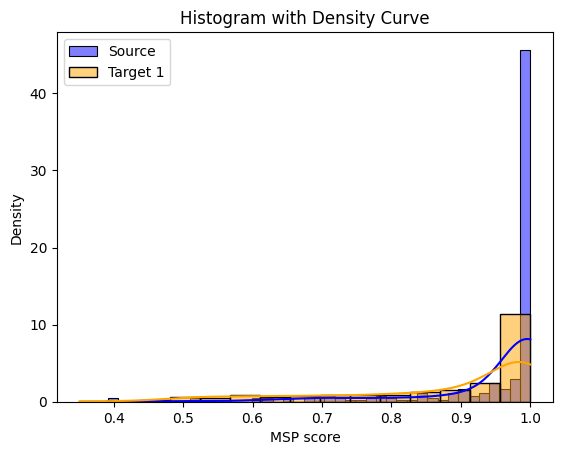

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the histogram with density curve
sns.histplot(src_MSP_scores_val, kde=True, stat='density', color='blue', label='Source')
sns.histplot(tar1_MSP_scores_loaded, kde=True, stat='density', color='orange', label='Target 1')

# Customize the plot
plt.xlabel("MSP score")
plt.ylabel("Density")
plt.title("Histogram with Density Curve")

# Add legend
plt.legend()

# Show the plot
plt.show()


For the analysis of overconfidence within the MSP baseline, a histogram plot was generated to visualize the distribution of data. The histogram illustrates two distinct sets of data: the source data, represented by blue bars indicating density, and the target data, depicted by orange bars. The x-axis denotes the MSP score, while the y-axis represents density. An observation from the plot reveals a significant overlap between the source and target data around the MSP score of 0.97. This overlap indicates a tendency towards overconfidence in the model. Notably, a portion of the data within the Overly Defined Data (ODD) category is erroneously classified as In-Distribution (ID), as evidenced by the overlap between the two datasets.

In [ ]:
# JUST FOR MORE INFO DONT RUN IT

      #-------------------- Here SR2 is selected
# id loader which is src__scores here
# id =  sonn_2_mdSet2
sonn_2_mdSet2 = [bed, toilet, desk, display,table]
sonn_2_mdSet2_labels = [0,1,2,3,2]
# target 1 OOD = sonn_2_mdSet1
sonn_2_mdSet1 = [chair, shelf, door, sink, sofa]
sonn_2_mdSet1_labels = [0,1,2,3,4]

      # -------------------  Hera SR1 is selected
# id =  sonn_2_mdSet1
sonn_2_mdSet1 = [chair, shelf, door, sink, sofa]
sonn_2_mdSet1_labels = [0,1,2,3,4]
# target 1 OOD = sonn_2_mdSet2
sonn_2_mdSet2 = [bed, toilet, desk, display,table]
sonn_2_mdSet2_labels = [0,1,2,3,2]

# target 2 is common for SR1 and SR2 = sonn_ood_common
sonn_ood_common = [bag, bin, box, cabinet, pillow]
sonn_ood_common_labels = [404,404,404,404,404]


THIS SECTION IS MSP VISUALIZATION

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Load data from the text file
file_path = '/content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/your_data.txt'  # Adjust the path accordingly
data = np.loadtxt(file_path)

# Determine the number of samples and points per sample
num_samples = data.shape[0] // 2048
num_points_per_sample = 2048

# Reshape the data into n samples with 2048 points each
reshaped_data = data.reshape(num_samples, num_points_per_sample, -1)
print("reshape data length: ", len(reshaped_data))

##### ATTENTION #####
# number 320 for toilet
# JUST REMEMBER THAT THE NUMBER YOU PUT AS INPUT MUST NOT BE HIGHER THAN THE SIZE OF TARGET LENGTH
# JUST CHANGE THE VALUE OF number TO CHANGE THE SAMPLE
number = 3
tar1_spec_pred_selectedSample = tar1_spec_scores[number]
print("The MSP SCORE FOR THIS SAMPLE IS: ", tar1_spec_pred_selectedSample)

# Select the samples to visualize (e.g., first and third samples)
selected_samples =[number]

# Example usage of class information
tar1_spec_labels  # Replace with your actual target labels
tar1_spec_pred  # Replace ... with actual predictions
index = number  # Replace 1 with the desired index

# THIS IS USED FOR TARGET 1 OOD FOR SR1


class_label_names_SR1 = {
    0: "bed",
    1: "toilet",
    2: "desk",
    3: "display",
    2: "table",
}

# THIS IS USED FOR TARGET 1 OOD FOR SR2
class_label_names_SR2 = {
    0: "chair",
    1: "shelf",
    2: "door",
    3: "sink",
    4: "sofa",
}

m = class_label_names_SR1 # WRITE YOUR CLASS LABEL HERE SELECT FROM TWO ABOVE
p = class_label_names_SR2
def get_class_info(index, m, tar1_spec_labels, tar1_spec_pred):
    if index < 0 or index >= len(reshaped_data):
        return "Index out of range"

    predicted_class_label = tar1_spec_pred[index]
    true_class_label = tar1_spec_labels[index]

    if predicted_class_label not in m or true_class_label not in m:
        return "Unknown class label"

    predicted_class_name = p[predicted_class_label]
    true_class_name = m[true_class_label]

    print('predicted_class_name')
    print('true_class_name')
    return f"The prediction is {predicted_class_name} but/and the label is {true_class_name}"

# Create an interactive 3D scatter plot with plotly for selected samples
fig = go.Figure()

for sample_index in selected_samples:
    if 0 <= sample_index < num_samples:
        sample_data = reshaped_data[sample_index]

        # Extract x, y, and z coordinates
        x = sample_data[:, 0]
        y = sample_data[:, 1]
        z = sample_data[:, 2]

        # Create a scatter plot trace for each selected sample
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=4), name=f'Sample {sample_index + 1}')
        fig.add_trace(trace)

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'))

# Include class information in the figure title
figure_title = get_class_info(index, m, tar1_spec_labels, tar1_spec_pred)
fig.update_layout(scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),title=figure_title, title_x=0.5, title_y=0.95)

# Show the plot
fig.show()


reshape data length:  297
The MSP SCORE FOR THIS SAMPLE IS:  0.9866297245025635
predicted_class_name
true_class_name


THIS SECTION IS FOR Euclidean distance of CLOSEST TRAINING SAMPLE

In [ ]:
# THIS SECTION IS FOR Euclidean distance of CLOSEST TRAINING SAMPLE
import numpy as np
import plotly.graph_objects as go

# Load your data from the text file
file_path = '/content/drive/MyDrive/SemNov_AML_DAAI_23-24/outputs/your_data01.txt'  # Adjust the path accordingly
data = np.loadtxt(file_path)

# Get the first index from the indices list
# JUST REMEMBER THAT THE NUMBER YOU PUT AS INPUT MUST NOT BE HIGHER THAN THE SIZE OF TARGET LENGTH
# 91 is chair
indice0 = indexCE[91]  # Assuming indexCE is defined somewhere in your code

# Define the size of each object (assuming each object has 1024 rows)
object_size = 1024

# Extract coordinates for the first index
start_idx = indice0 * object_size
end_idx = start_idx + object_size
coordinates = data[start_idx:end_idx]

# Print the coordinates of the selected object
print(f"Coordinates for object with index {indice0}:")
print(coordinates)

# Create an interactive 3D scatter plot with Plotly for selected samples
fig = go.Figure()

# Add the selected object to the plot
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=4), name=f'Object {indice0}'))

# Set axis labels and title
fig.update_layout(scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
                  title='Closest Training Sample', title_x=0.5, title_y=0.95)  # Adjust title_x and title_y as needed

# Show the plot
fig.show()




Coordinates for object with index 578:
[[-0.32040188 -0.6188402  -0.48872638]
 [ 0.22450335 -0.03055518 -0.33315802]
 [ 0.22015889 -0.03056442 -0.30311662]
 ...
 [ 0.21590689 -0.01066314  0.04025221]
 [ 0.08122886  0.53391856  0.31897193]
 [-0.35617426 -0.8086096   0.43026385]]


THIS SECTION IS FOR Euclidean distance of TARGET1

In [ ]:


# THIS SECTION IS FOR Euclidean distance of TARGET1
import numpy as np
import plotly.graph_objects as go

# Load your data from the text file
file_path = '/content/drive/MyDrive/3DSemanticNoveltyDetection/outputs/your_data02.txt'  # Adjust the path accordingly
data = np.loadtxt(file_path)


# Get the first index from the indices list
# JUST REMEMBER THAT THE NUMBER YOU PUT AS INPUT MUST NOT BE HIGHER THAN THE SIZE OF TARGET LENGTH
indice0 = indexCE[91]
print("The Distance Score is :",tar1_distance[indice0])
# Define the size of each object (assuming each object has 1024 rows)
object_size = 2048

# Select the samples to visualize (e.g., first and third samples)
selected_samples =[indice0]

# Example usage of class information
index = indice0  # Replace 1 with the desired index

# THIS IS USED FOR TARGET 1 OOD FOR SR1
tar1_pred
tar1_labels

class_label_names_SR1 = {
    0: "bed",
    1: "toilet",
    2: "desk",
    3: "display",
    2: "table",
}

# THIS IS USED FOR TARGET 1 OOD FOR SR2
class_label_names_SR2 = {
    0: "chair",
    1: "shelf",
    2: "door",
    3: "sink",
    4: "sofa",
}

m = class_label_names_SR1 # WRITE YOUR CLASS LABEL HERE SELECT FROM TWO ABOVE
p = class_label_names_SR2
def get_class_info(index, m, tar1_labels, tar1_pred ):


    predicted_class_label = tar1_pred [index]
    true_class_label = tar1_labels[index]

    if predicted_class_label not in m or true_class_label not in m:
        return "Unknown class label"

    predicted_class_name = p[predicted_class_label]
    true_class_name = m[true_class_label]

    print('predicted_class_name')
    print('true_class_name')
    return f"The prediction is {predicted_class_name} but/and the label is {true_class_name}"

# Extract coordinates for the first index
start_idx = indice0 * object_size
end_idx = start_idx + object_size
coordinates = data[start_idx:end_idx]

# Print the coordinates of the selected object
print(f"Coordinates for object with index {indice0}:")
print(coordinates)

# Create an interactive 3D scatter plot with Plotly for selected samples
fig = go.Figure()

# Add the selected object to the plot
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=4), name=f'Object {indice0}'))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'))

# Include class information in the figure title
figure_title = get_class_info(index, m, tar1_labels, tar1_pred)
fig.update_layout(scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),title=figure_title, title_x=0.5, title_y=0.95)


The Distance Score is : 5.114225387573242
Coordinates for object with index 578:
[[-0.34477153  0.7110976   0.321675  ]
 [ 0.23915277  0.05990139 -0.564053  ]
 [-0.06352251  0.14032124  0.24294347]
 ...
 [-0.07577275  0.11991669  0.21669963]
 [ 0.08476249  0.11407744 -0.49844357]
 [-0.03640699  0.42900297  0.21293017]]
predicted_class_name
true_class_name


THRESHOLD COMPUTING

In [ ]:
import numpy as np

# Function to calculate the threshold based on inside distribution (ID) data
def calculate_threshold_inside_distribution(id_scores, confidence_level):
    threshold = np.percentile(id_scores, confidence_level * 100)
    return threshold

# Example usage:
src_MSP_scores_val  # Your list or array of inside distribution (ID) scores

# Confidence level, e.g., 0.9 for 90% confidence
confidence_level = 0.9

threshold_inside_distribution = calculate_threshold_inside_distribution(src_MSP_scores_val, confidence_level)
print("Threshold for inside distribution (ID) data:", threshold_inside_distribution)

print("average: ", np.mean(src_MSP_scores_val))


Threshold for inside distribution (ID) data: 0.9765987396240234
average:  0.9462737552673218


**Evaluation of Pre Trained Model from OpenShape**

In [ ]:

!pip install torch
!pip install torchvision
!pip install huggingface.hub wandb torch_redstone numpy dgl einops
!pip install transformers

In [ ]:
!python  B32_Eval.py --config cfgs/dgcnn-cla.yaml --exp_name B32_Eval --num_workers 2 --src SR2  --checkpoints_dir Pointbert_vitB32  --ckpt_path Pointbert_vitB32/model.pt  --script_mode eval

Streaming output truncated to the last 5000 lines.
        -0.0507, -0.0980,  0.0074, -0.0112,  0.1305,  0.1103, -0.1013, -0.1165,
        -0.1373, -0.0769, -0.0997, -0.1287, -0.0082,  0.0667, -0.1508,  0.1380,
         0.1040,  0.0557,  0.0194,  0.1465,  0.1193, -0.0267, -0.0582, -0.0942,
        -0.0551,  0.0074,  0.0478, -0.0548, -0.0240,  0.1034,  0.0842, -0.0573,
         0.1323,  0.0266,  0.0041,  0.0510,  0.0676,  0.0046,  0.0873, -0.0895,
        -0.0928,  0.0215,  0.0118, -0.0431,  0.0418, -0.1239,  0.0913, -0.0902,
        -0.0265, -0.1354,  0.1335, -0.1534, -0.0444,  0.0643,  0.1499, -0.0137,
         0.0038, -0.1147,  0.0303,  0.0967, -0.0251,  0.0142, -0.1056,  0.1226,
        -0.0623,  0.1196, -0.1314, -0.0764,  0.0787,  0.1143, -0.0176, -0.1018,
        -0.0478,  0.1026, -0.0438, -0.0168, -0.0983,  0.1402,  0.0636,  0.0805,
         0.0990,  0.1289,  0.1261, -0.1068, -0.0862, -0.0882, -0.0411, -0.0422,
        -0.0050,  0.0761,  0.1387, -0.1113, -0.1376,  0.0708,  0.0856

In [ ]:
!python  L14_Eval.py --config cfgs/dgcnn-cla.yaml --exp_name L14_Eval --num_workers 2 --src SR1  --checkpoints_dir Pointbert_L14  --ckpt_path Pointbert_L14/model.pt  --script_mode eval

Cannot import torchlars
Cannot load RSCNN: No module named 'pointnet2_ops'
Cannot load PCT: No module named 'pointnet2_ops'
Cannot load PointMLP: No module named 'pointnet2_ops'
Cannot load PointNet2: No module named 'pointnet2_ops'
out-of-distribution eval - Modelnet -> SONN ..
Arguments: Namespace(local_rank=None, use_sync_bn=False, use_amp=False, script_mode='eval', config='cfgs/dgcnn-cla.yaml', seed=1, epochs=150, batch_size=1, num_workers=2, resume=None, apply_fix_cellphone=True, data_root='./3D_OS_release_data', checkpoints_dir='Pointbert_L14', exp_name='L14_Eval', eval_step=1, save_step=10, ckpt_path='Pointbert_L14/model.pt', src='SR1', sonn_split='main_split', sonn_h5_name='objectdataset.h5', augm_set='rw', grad_norm_clip=-1, num_points=1024, num_points_test=2048, wandb_name=None, wandb_group='md-2-sonn-augmCorr', wandb_proj='benchmark-3d-ood-cla', loss='CE', cs=False, cs_gan_lr=0.0002, cs_beta=0.1, save_feats=None, corruption=None, tar1='none', tar2='none')
ModelNet40_OOD - Re